In [1]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.data"
df = pd.read_csv(url, header=None)

In [2]:
df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


In [3]:
df.iloc[:, -1] = df.iloc[:, -1].apply(pd.to_numeric, errors='coerce', downcast="integer")
df.dropna(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 197
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       194 non-null    int64  
 1   1       194 non-null    object 
 2   2       194 non-null    int64  
 3   3       194 non-null    float64
 4   4       194 non-null    float64
 5   5       194 non-null    float64
 6   6       194 non-null    float64
 7   7       194 non-null    float64
 8   8       194 non-null    float64
 9   9       194 non-null    float64
 10  10      194 non-null    float64
 11  11      194 non-null    float64
 12  12      194 non-null    float64
 13  13      194 non-null    float64
 14  14      194 non-null    float64
 15  15      194 non-null    float64
 16  16      194 non-null    float64
 17  17      194 non-null    float64
 18  18      194 non-null    float64
 19  19      194 non-null    float64
 20  20      194 non-null    float64
 21  21      194 non-null    float64
 22  22

In [5]:
from sklearn.preprocessing import LabelEncoder
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [6]:
X

array([[3.100e+01, 1.802e+01, 2.760e+01, ..., 8.113e-02, 5.000e+00,
        5.000e+00],
       [6.100e+01, 1.799e+01, 1.038e+01, ..., 1.189e-01, 3.000e+00,
        2.000e+00],
       [1.160e+02, 2.137e+01, 1.744e+01, ..., 9.067e-02, 2.500e+00,
        0.000e+00],
       ...,
       [8.000e+00, 1.544e+01, 3.118e+01, ..., 8.024e-02, 1.500e+00,
        0.000e+00],
       [1.200e+01, 1.717e+01, 2.919e+01, ..., 6.033e-02, 3.700e+00,
        0.000e+00],
       [6.000e+00, 1.670e+01, 2.813e+01, ..., 8.036e-02, 3.500e+00,
        0.000e+00]])

In [7]:
label_encoder.transform(["N", "R"])

array([0, 1])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=1)

In [9]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [11]:
pipe_lr = Pipeline(
    [
        ("scl", StandardScaler()),
        ("pca", PCA(n_components=2)),
        ("clf", LogisticRegression(random_state=1))
    ]
)
pipe_lr.fit(X_train, y_train)
print(f"On Test Data {pipe_lr.score(X_test, y_test):,.3f}")

On Test Data 0.718


Dated Syntax

In [19]:
# import numpy as np
# from sklearn.model_selection import StratifiedKFold

# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
# kfold.get_n_splits(y_train)
# for k, (train, test) in enumerate(kfold):
#     pipe_lr.fit(X_train[train], y_train[train])
#     score = pipe_lr.score(X_train[train], y_train[train])
#     scores.append(score)
#     print(
#         f"Block: {k+1} class distribution: {np.bincount(y_train[train])}, accuracy: {score:,.3}")

TypeError: 'StratifiedKFold' object is not iterable

In [38]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC

pipe_svc = Pipeline([
    ("scl", StandardScaler()),
    ("clf", SVC(random_state=1))
])
param_range = [.0001, .001, .01, .1, 1., 10., 100., 1000.]
param_grid = [
    {"clf__C": param_range, "clf__kernel": ["linear"]},
    {"clf__C": param_range, "clf__gamma": param_range, "clf__kernel": ["rbf"]}
]
gs = GridSearchCV(
    estimator=pipe_svc, param_grid=param_grid, scoring="accuracy", n_jobs=-1, cv=10
)
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('clf', SVC(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                     1000.0],
                          'clf__kernel': ['linear']},
                         {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                     1000.0],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                         100.0, 1000.0],
                          'clf__kernel': ['rbf']}],
             scoring='accuracy')

In [39]:
gs.best_score_

0.8016666666666665

In [40]:
gs.best_params_

{'clf__C': 10.0, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}

In [41]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7948717948717948

In [42]:
gs = GridSearchCV(
    estimator=pipe_svc, param_grid=param_grid, scoring="accuracy", n_jobs=-1, cv=2
)
scores = cross_val_score(gs, X_train, y_train, scoring="accuracy", cv=2)

In [43]:
np.mean(scores)

0.7807192807192808

In [44]:
np.std(scores)

0.011488511488511488

In [45]:
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)

/home/green-machine/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


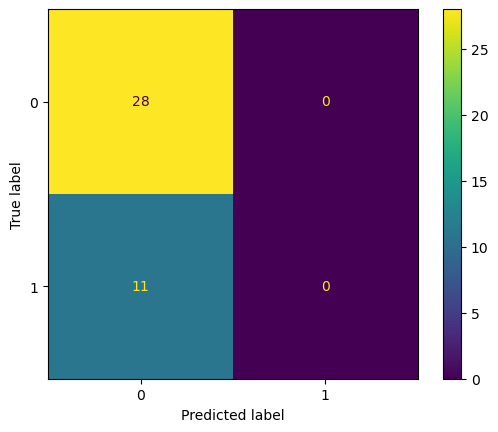

In [46]:
plot_confusion_matrix(estimator=pipe_svc, X=X_test, y_true=y_test)